<a href="https://colab.research.google.com/github/aartikushal/RANDOM-FOREST-ASSIGNMENT/blob/main/RANDOM_FOREST_ASSIGNMENT_PART2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***1. Setup and Data Preparation:***
- Import necessary libraries: pandas, matplotlib, scikit-learn.
- Load the dataset for Random Forest modeling.
- Preprocess the data, handle missing values, and encode categorical variables.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

# View basic info
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None
      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female

In [2]:
# Impute missing numerical values
imputer = SimpleImputer(strategy="mean")
df["bmi"] = imputer.fit_transform(df[["bmi"]])


In [3]:
# Label encode all object-type columns
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])


In [4]:
X = df.drop(columns=["id", "stroke"])  # Features
y = df["stroke"]                       # Target


In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


# ***2. Random Forest Parameters:***
- Choose appropriate hyperparameters such as the number of trees, maximum depth,
minimum samples per leaf, and splitting criteria based on data exploration.

In [6]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    criterion='gini',
    random_state=42
)


# ***3. Building the Random Forest:***
- Initialize the Random Forest model with selected parameters.
- Train the Random Forest model on the prepared training data.

In [7]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest with selected hyperparameters
rf_model = RandomForestClassifier(
    n_estimators=100,         # Number of trees
    max_depth=10,             # Max tree depth
    min_samples_split=5,      # Minimum samples to split
    min_samples_leaf=2,       # Minimum samples at a leaf node
    criterion='gini',         # Splitting criteria
    random_state=42           # For reproducibility
)


In [8]:
# Fit the model to your training data
rf_model.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                       random_state=42)

# **4. Model Evaluation**:
- Evaluate the trained model using appropriate metrics such as accuracy, precision, recall, and
F1-score.
- Analyze feature importance provided by the Random Forest model.

In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


In [10]:
# Predict on test data
y_pred = rf_model.predict(X_test)

# Evaluation metrics
print("✅ Model Evaluation Metrics:")
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='binary'))  # For binary classification
print("Recall   :", recall_score(y_test, y_pred, average='binary'))
print("F1-score :", f1_score(y_test, y_pred, average='binary'))

# Full classification report
print("\n📄 Classification Report:")
print(classification_report(y_test, y_pred))


✅ Model Evaluation Metrics:
Accuracy : 0.9419439008480104
Precision: 0.0
Recall   : 0.0
F1-score : 0.0

📄 Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1444
           1       0.00      0.00      0.00        89

    accuracy                           0.94      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.89      0.94      0.91      1533



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

<ipython-input-11-3972998078>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette='viridis')
<ipython-input-11-3972998078>:15: UserWarning: Glyph 128161 (\N{ELECTRIC LIGHT BULB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128161 (\N{ELECTRIC LIGHT BULB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


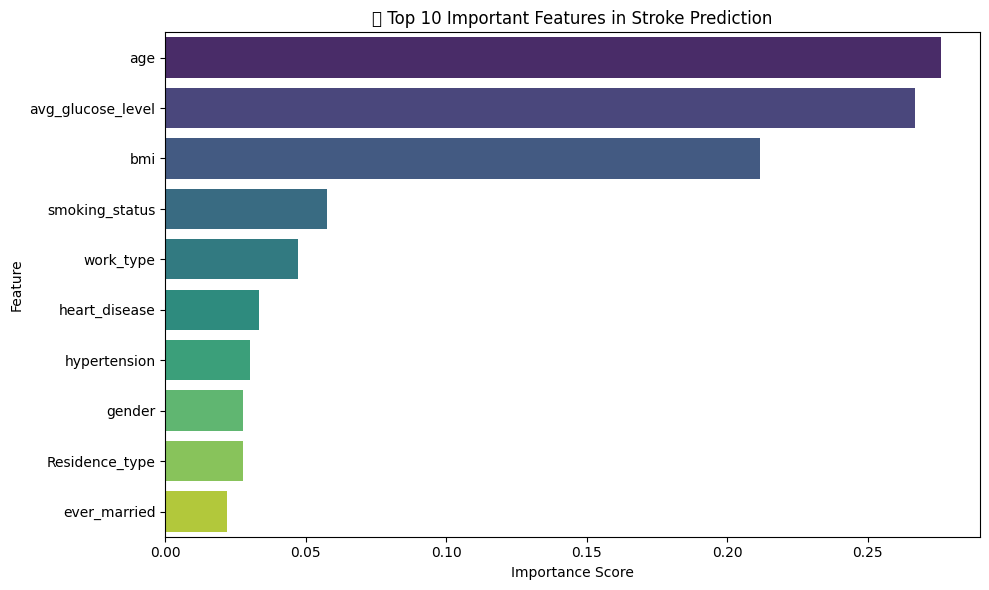

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extract feature importances
feature_importance = pd.Series(rf_model.feature_importances_, index=X_train.columns)
top_features = feature_importance.sort_values(ascending=False).head(10)

# Plot top features
plt.figure(figsize=(10, 6))
sns.barplot(x=top_features.values, y=top_features.index, palette='viridis')
plt.title("💡 Top 10 Important Features in Stroke Prediction")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


# ***5. Hyperparameter Tuning and Optimization:***
- Perform hyperparameter tuning using techniques like grid search or random search to
optimize model performance.
- Validate the optimized model using cross-validation techniques.

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


In [13]:
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}


In [14]:
# Initialize base Random Forest model
rf = RandomForestClassifier(random_state=42)

# Initialize Grid Search
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,                       # 5-fold cross-validation
    scoring='f1',               # Optimize based on F1-score
    n_jobs=-1,                  # Use all processors
    verbose=1
)

# Perform grid search on training data
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 162 candidates, totalling 810 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 150, 200]},
             scoring='f1', verbose=1)

In [15]:
print("✅ Best Parameters:", grid_search.best_params_)
print("📈 Best Cross-Validated F1 Score:", grid_search.best_score_)


✅ Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
📈 Best Cross-Validated F1 Score: 0.012121212121212121


In [16]:
# Predict using the best model
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

# Evaluate optimized model
from sklearn.metrics import classification_report
print("\n📊 Classification Report (Optimized Model):")
print(classification_report(y_test, y_pred_best))



📊 Classification Report (Optimized Model):
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1444
           1       0.00      0.00      0.00        89

    accuracy                           0.94      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.89      0.94      0.91      1533



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
